## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

### You Try - 3 Warm-Up Problems From Lecture

### You Try

Try applying some other function that are available to the groupby object. See if you can figure out what the function is doing. To see all the possible functions try groupby. and then hit tab!

In [2]:
df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,-0.098368,0.902345
1,a,2,0.876420,-0.454061
2,None,1,-1.518248,-1.014609
3,b,2,-0.177832,0.608660
4,b,1,-0.450689,-0.256145
5,a,<NA>,2.317524,-0.798053
6,None,1,0.729141,0.594258


In [30]:
# Your code here
df.groupby('key1').corr()

key2     data1     data2
key1                                
a    key2    1.0  1.000000 -1.000000
     data1   1.0  1.000000 -0.903863
     data2  -1.0 -0.903863  1.000000
b    key2    1.0  1.000000  1.000000
     data1   1.0  1.000000  1.000000
     data2   1.0  1.000000  1.000000

.corr calculates the correlation between columns.

In [32]:
df.groupby('key1').count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


.count returns the number of observations in each group and column.

In [36]:
df.groupby('key1').cummax()

,key2,data1,data2
0,1.0,-0.098368,0.902345
1,2.0,0.876420,0.902345
2,NaN,NaN,NaN
3,2.0,-0.177832,0.608660
4,2.0,-0.177832,0.608660
5,<NA>,2.317524,0.902345
6,NaN,NaN,NaN


.cummax replaces values with the max of each column for all observations in that group.

In [46]:
df.groupby('key1').first()

,key2,data1,data2
key1,,,
a,1,-0.098368,0.902345
b,2,-0.177832,0.608660


.first() returns the first observation from each index.

In [51]:
df.groupby('key1').get_group('a')

,key1,key2,data1,data2
0,a,1,-0.098368,0.902345
1,a,2,0.876420,-0.454061
5,a,<NA>,2.317524,-0.798053


.get_group returns the df masked to only show observations with a specified index.

key1
a    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
b    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

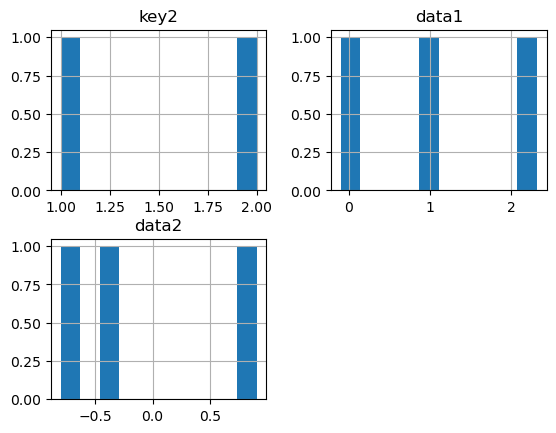

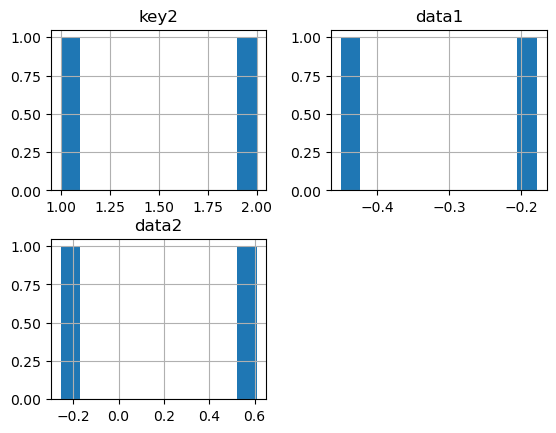

In [53]:
df.groupby('key1').hist()

.hist() creates multipled histogram plots, grouped by the index and individual plots for each column.

In [54]:
df.groupby('key1').ngroup()

0    0.0
1    0.0
2    NaN
3    1.0
4    1.0
5    0.0
6    NaN
dtype: float64

.ngroup returns what group each observation is in based on a number index.

In [59]:
df.groupby('key1').skew()

,key2,data1,data2
key1,,,
a,<NA>,0.566085,1.451165
b,<NA>,NaN,NaN


.skew returns the skewness of the grouped data (-1 is left skew, 0 is normal, 1 is right skew).

### You Try

Read in the macro data - same as last class - just run the code below.

Then group the data by year and apply  a function that makes sense with this data. Something like mean, max, min, etc...

Finally plot the resulting time-series data. For example, the average cpi over time.

In [60]:
macro = pd.read_csv("data/macrodata.csv")
data = macro[["year","quarter","cpi", "m1", "tbilrate", "unemp"]]

<Axes: xlabel='year'>

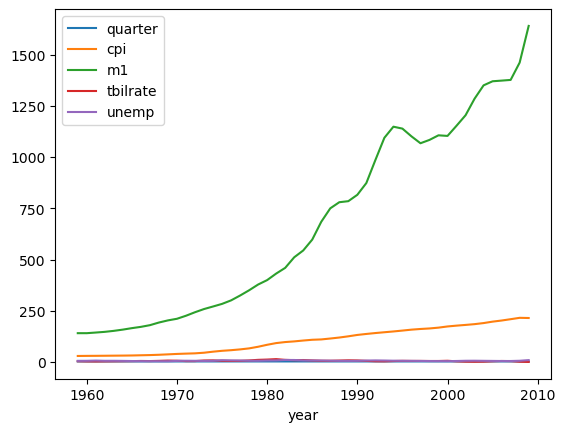

In [63]:
# Your code here
data.groupby('year').mean().plot()

### You Try

What happens when you run the following command using the tip data? Can you predict what the output will be before you run the code? Then run the code and explain the results. Finally make a plot - your choice on the type.

    grouped = tips.groupby(["day", "smoker","time"])
    functions = ["count", "mean", "max"]
    result = grouped[["tip_pct", "total_bill"]].agg(functions)
    result

In [64]:
tips = pd.read_csv("data/tips.csv")
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


**Prediction:** It will return the count, mean, and max of the tip_pct and total_bill columns while they are grouped by day, then smoker, then time.

In [65]:
# Your code here
grouped = tips.groupby(["day", "smoker","time"])
functions = ["count", "mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)
result

tip_pct                     total_bill                  
                     count      mean       max      count       mean    max
day  smoker time                                                           
Fri  No     Dinner       3  0.139622  0.155625          3  19.233333  22.75
            Lunch        1  0.187735  0.187735          1  15.980000  15.98
     Yes    Dinner       9  0.165347  0.263480          9  19.806667  40.17
            Lunch        6  0.188937  0.259314          6  12.323333  16.27
Sat  No     Dinner      45  0.158048  0.291990         45  19.661778  48.33
     Yes    Dinner      42  0.147906  0.325733         42  21.276667  50.81
Sun  No     Dinner      57  0.160113  0.252672         57  20.506667  48.17
     Yes    Dinner      19  0.187250  0.710345         19  24.120000  45.35
Thur No     Dinner       1  0.159744  0.159744          1  18.780000  18.78
            Lunch       44  0.160311  0.266312         44  17.075227  41.19
     Yes    Lunch       17  0.163863  0.241255         17  19.190588  43.11

My prediction was correct. The indexes used for grouping (functions) are heirarchical, so go in order of day, smoker, then time.

<Axes: xlabel='day,smoker,time'>

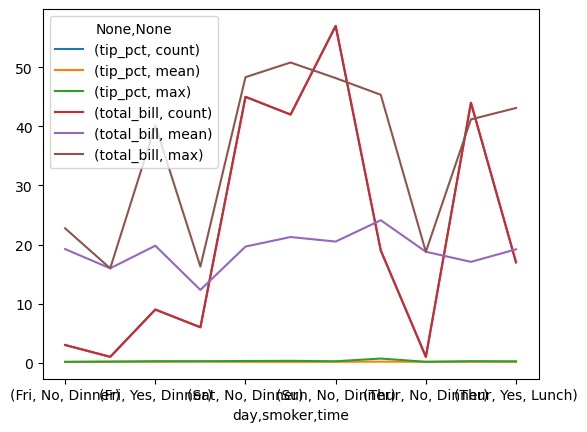

In [76]:
result.plot()

array([[<Axes: title={'center': "('tip_pct', 'count')"}>,
        <Axes: title={'center': "('tip_pct', 'mean')"}>],
       [<Axes: title={'center': "('tip_pct', 'max')"}>,
        <Axes: title={'center': "('total_bill', 'count')"}>],
       [<Axes: title={'center': "('total_bill', 'mean')"}>,
        <Axes: title={'center': "('total_bill', 'max')"}>]], dtype=object)

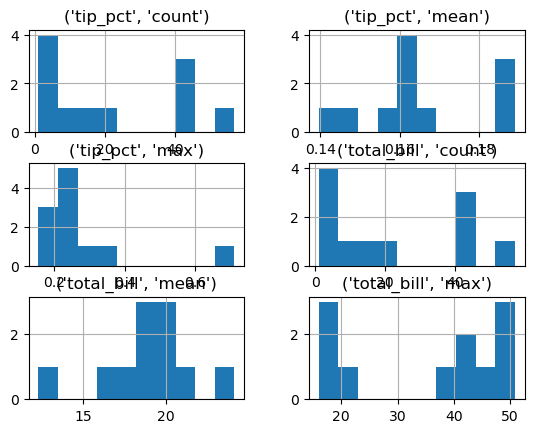

In [75]:
result.hist()

---------------
## Aggregation and Grouping - Day8 HW


### Get the data

Import the data that you find here:

(Video Game Sales)[https://www.kaggle.com/datasets/gregorut/videogamesales]

Start you assignment with a discussion of the data. Is there a license, how was it generated, what are the variables and units? Then do an analysis using the grouping functions we learned in class. Here are some ideas, but you are welcome to go off script.

1. Cross-tabulate the number of games across platforms and genres. Sort this to see which platforms have the most overall games. Then make a dataframe that contains the cross-tabulated results for just four Platforms that have the most overall games.
2. Focusing on the columns that contain sales data for EU,NA, and JP, create a table that shows the mean sales for of the the top for platforms. Make a plot of this data. (bar plot)
3. Again focusing on the columns that contain sales data, create a table that shows the mean sales for each genre. Make a plot of this data.
4. Create a table that shows the mean and max sales for each year and for each sales region (NA,EU,JP). From this data make a scatter or line plot that shows how the max sales data changed over the years.

Here are some examples of my ouputs

- images/CountsTop5.png
- images/GenreAverageSales.png
- images/MaxSalesperYear.png
- images/PlatformAverageSales.png

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day6 stuff in it: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.